In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [56]:
def zscore_normal(x):
        mu = np.mean(x,axis=0)
        sigma = np.std(x,axis=0)
        x_norm = (x-mu)/sigma

        return (x_norm)
        
def mean_normal(x):
        mu = np.mean(x,axis=0)
        x_norm = (x-mu)/(np.max(x)-np.min(x))
                
        return (x_norm)

def r2_score(y,y_pred):
        y_avg = np.average(y, axis=0)
        num = 0
        den = 0
        for i in range(y.shape[0]):
                num = num + (y[i]-y_pred[i])**2
                den = den + (y[i]-y_avg)**2
        return (1 - (num/den))

def mode(row):
        unique_ele, count = np.unique(row, return_counts=True)
        max_idx = np.argmax(count)
        mode = unique_ele[max_idx]

        return mode

def calculate_accuracy(y_pred, y_true):
    c = 0
    for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[i]:
            c += 1
    return c / y_true.shape[0]

        
def plot_cost(Cost_list, iterations):
        t = np.arange(0, iterations)
        plt.plot(t, Cost_list)
        plt.show

In [57]:
class KNN:
    
    def __init__(self,k):
        self.k = k
        self.x_train = None
        self.y_train = None
        
    def euclidean_dist(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    
    def fit(self, X, Y):
        self.x_train = X
        self.y_train = Y
    
    def neighbours(self,row_train):

        distances = list()

        for (row_test, class_y) in zip(self.x_train,self.y_train):
            dist = self.euclidean_dist(row_test,row_train)
            distances.append((dist,class_y))
            
        distances.sort(key=lambda x: x[0])

        neighbours = list()
        
        for i in range(self.k):
            neighbours.append(distances[i][1])
        
        return neighbours
    
    def predict(self, Xtest):
        prediction = []
        i = 0
        n = len(Xtest)
        for row in Xtest:
            nearest_neigh = self.neighbours(row)

            voting = mode(nearest_neigh)
            prediction.append(voting)
            if i % math.ceil(n / 10) == 0:
                print(f"{i}th prediction done")
            i += 1
        return(np.array(prediction))

In [58]:
file_path = 'Classification_train.csv'
df = pd.read_csv(file_path, dtype='float64')

y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

x_train = x[0:24000]
y_train = y[0:24000].reshape(-1,)

In [60]:
print("Shape of training set input: ", x_train.shape)
print("Shape of training set output: ", y_train.shape)

Shape of training set input:  (24000, 784)
Shape of training set output:  (24000,)


In [61]:
x_cv=x[24000:]
y_cv=y[24000:]
x_cv = np.array(x_cv,dtype=float)
y_cv = np.array(y_cv,dtype=float)
y_cv = y_cv.transpose()
x_cv = mean_normal(x_cv)

In [62]:
print("Shape of cross-validation set input: ", x_cv.shape)
print("Shape of cross-validation set output: ", y_cv.shape)

Shape of cross-validation set input:  (6000, 784)
Shape of cross-validation set output:  (6000,)


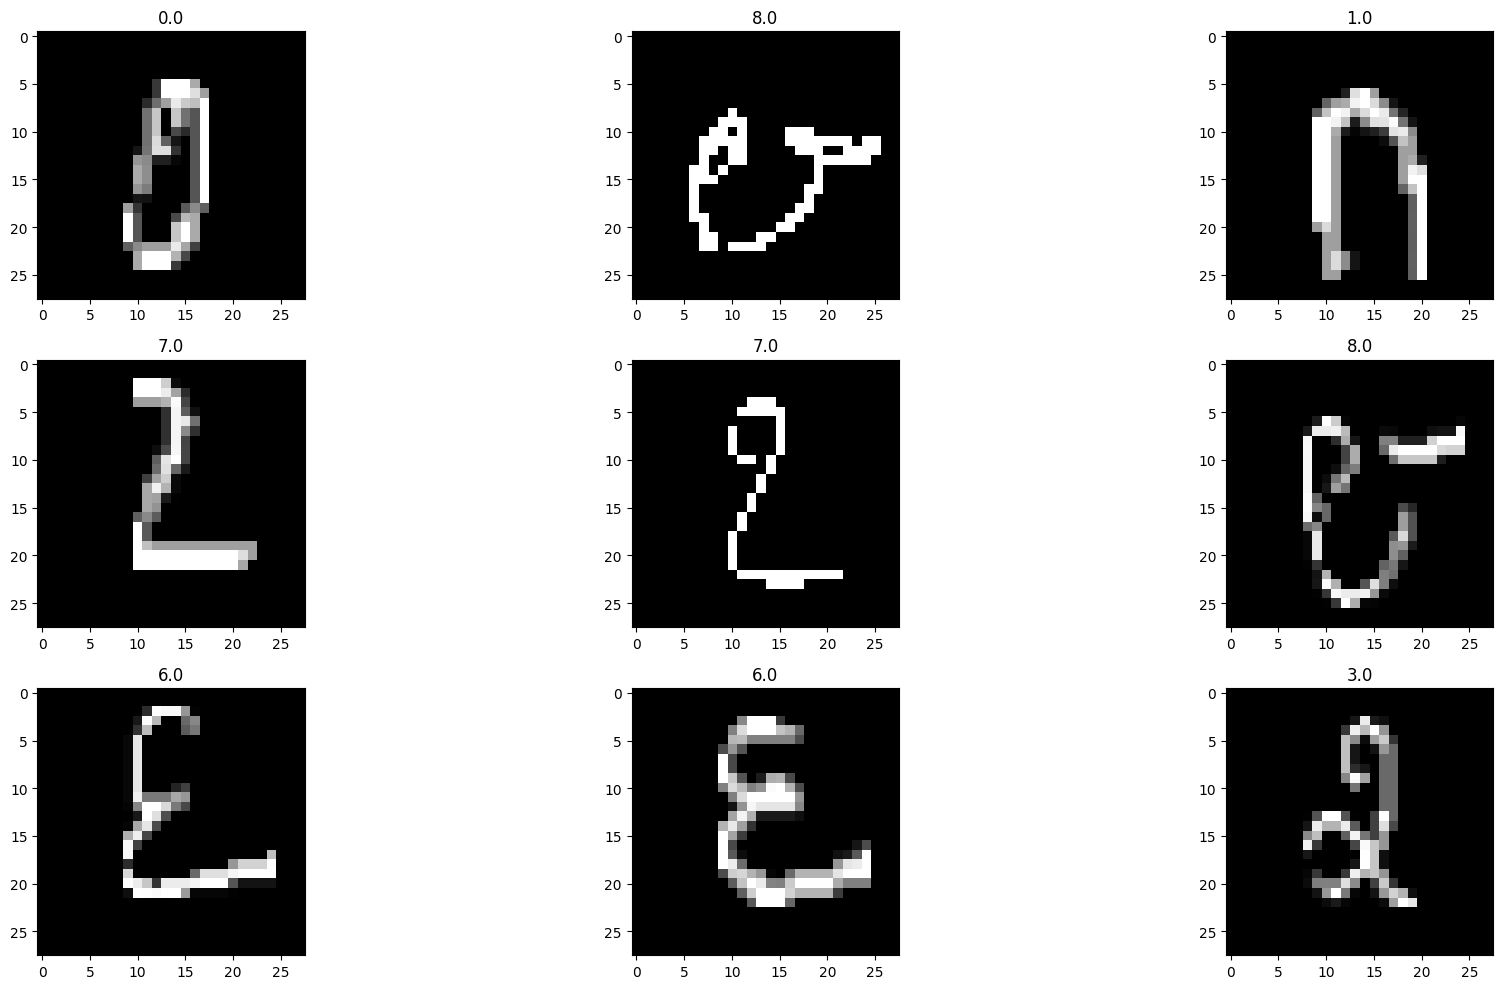

In [63]:
fig, ax = plt.subplots(3,3, figsize =(20,10))
c = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(x_train[c].reshape(28,28),cmap='gray')
        ax[i][j].set_title(y[c])
        c += 1
plt.tight_layout()
plt.show()

In [30]:
# k_values = []
# accuracy_list = []

# for i in range(1, 11, 1):
#     print(f"For K = {i}")
#     knn = KNN(i)

#     x_train_normalized = mean_normal(x_train)

#     knn.fit(x_train_normalized, y_train)

#     y_pred = knn.predict(x_cv)

#     acc = calculate_accuracy(y_pred, y_cv)

#     accuracy_list.append(acc)
#     k_values.append(i)
#     print("Accuracy: ", acc)

For K = 1
0th prediction done
600th prediction done
1200th prediction done
1800th prediction done
2400th prediction done
3000th prediction done
3600th prediction done
4200th prediction done
4800th prediction done
5400th prediction done
Accuracy:  0.8955
For K = 2
0th prediction done
600th prediction done
1200th prediction done
1800th prediction done
2400th prediction done
3000th prediction done
3600th prediction done
4200th prediction done
4800th prediction done
5400th prediction done
Accuracy:  0.8805
For K = 3
0th prediction done
600th prediction done
1200th prediction done
1800th prediction done
2400th prediction done
3000th prediction done
3600th prediction done
4200th prediction done
4800th prediction done
5400th prediction done
Accuracy:  0.9175
For K = 4
0th prediction done
600th prediction done
1200th prediction done
1800th prediction done
2400th prediction done
3000th prediction done
3600th prediction done
4200th prediction done
4800th prediction done
5400th prediction done
Ac

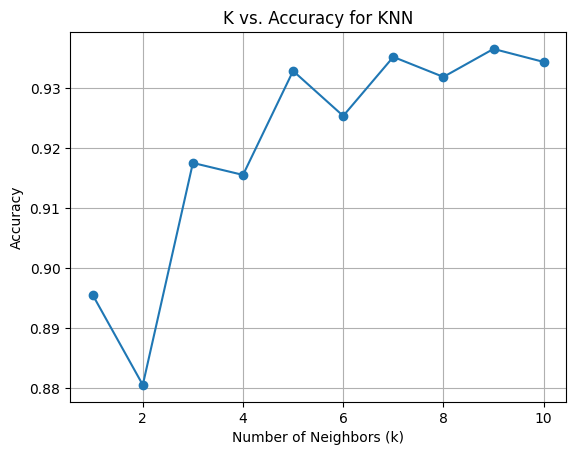

In [31]:
# plt.plot(k_values, accuracy_list, marker='o')
# plt.title('K vs. Accuracy for KNN')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Accuracy')
# plt.grid(True)
# plt.show()

In [64]:
knn = KNN(9)

x_train_normalized = mean_normal(x_train)

knn.fit(x_train_normalized, y_train)

y_pred = knn.predict(x_cv)

acc = calculate_accuracy(y_pred, y_cv)

print("Accuracy: ", acc)

0th prediction done
600th prediction done
1200th prediction done
1800th prediction done
2400th prediction done
3000th prediction done
3600th prediction done
4200th prediction done
4800th prediction done
5400th prediction done
Accuracy:  0.9763333333333334


In [65]:
file_path = 'Classification_test.csv'
df = pd.read_csv(file_path, dtype='float64')

test_id = df.iloc[:, 0].values
x_test = df.iloc[:, 1:].values

x_test = np.array(x_test, dtype=float)
x_test = mean_normal(x_test)

In [66]:
print("Shape of test set input: ", x_test.shape)

Shape of test set input:  (10000, 784)


In [67]:
y_test = knn.predict(x_test)

0th prediction done
1000th prediction done
2000th prediction done
3000th prediction done
4000th prediction done
5000th prediction done
6000th prediction done
7000th prediction done
8000th prediction done
9000th prediction done


In [68]:
print(y_test)

[0. 4. 5. ... 0. 8. 4.]


In [69]:
output = np.array((test_id, y_test))
print(output)

[[1.5795e+04 8.6000e+02 5.3900e+03 ... 6.3400e+02 1.0057e+04 1.3345e+04]
 [0.0000e+00 4.0000e+00 5.0000e+00 ... 0.0000e+00 8.0000e+00 4.0000e+00]]


In [70]:
output_data = {'ID': output[0], 'Output': output[1]}

output_df = pd.DataFrame(output_data)

output_csv_path = 'KNN Output.csv'
output_df.to_csv(output_csv_path, index=False)

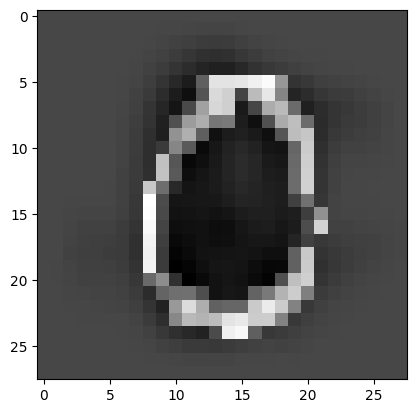

Our model says it is : 0.0


In [93]:
import random
idx = int(random.randrange(0,x_test.shape[1]))
plt.imshow(x_test.T[:, idx].reshape((28,28)),cmap='gray')
plt.show()


print("Our model says it is :", y_test[idx])